<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Learning/blob/main/05%20-%20Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.인공신경망
- y = x^2 + 3


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 10000

In [3]:
# 1000*1 노이즈 벡터 생성
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
# 1000*1 x 벡터 생성
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
# 1000*1 y 벡터 생성
y = (x**2) + 3
# 1000*1 노이즈 섞인 y 벡터 생성
y_noise = y + noise

In [4]:
print(y[:5])
print(y_noise[:5])

tensor([[  4.6696],
        [119.9925],
        [ 18.8368],
        [  8.4880],
        [ 91.6080]])
tensor([[  3.7672],
        [120.7723],
        [ 19.4911],
        [  8.7031],
        [ 90.7439]])


## 2.모델, 손실함수, 최적화 함수

In [5]:
# 모델 생성
model = nn.Sequential(nn.Linear(1,6),
                      nn.ReLU(),
                      nn.Linear(6,10),
                      nn.ReLU(),
                      nn.Linear(10,6),
                      nn.ReLU(),
                      nn.Linear(6,1))
# 손실함수 생성
loss_func = nn.L1Loss()
# 최적화 함수 생성
optimizer = optim.SGD(model.parameters(),lr=0.0002)

## 3.모델의 학습

In [6]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()

    loss_array.append(loss.detach().numpy())

## 4.손실 그래프

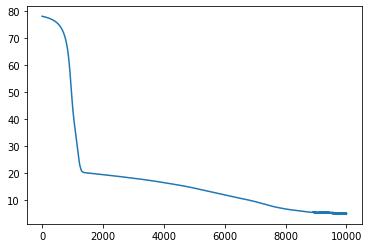

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 5.학습된 모델의 결과값과 실제 목표값의 비교

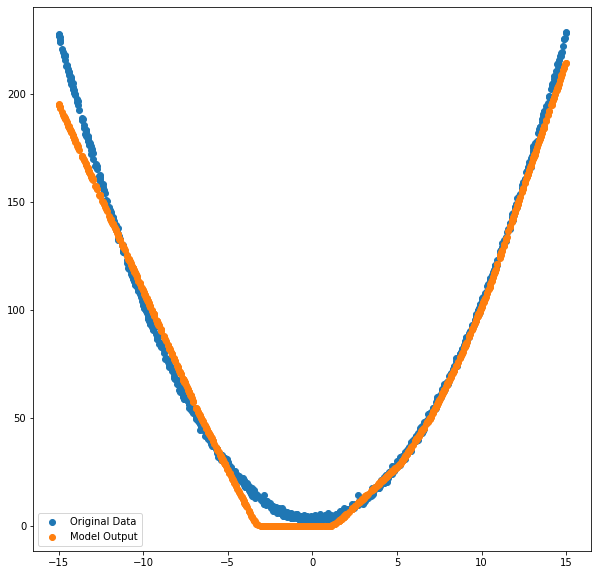

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()